In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/balanced_data.csv')
df.shape

(2718508, 42)

In [3]:
# Determining correlation between all features of dataset
corrMatrix = df.corr().round(3)
corrMatrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000,0.041,0.020,-0.000,-0.002,0.004,0.003,0.007,-0.046,0.027,...,0.031,-0.118,-0.121,0.409,0.105,-0.017,-0.061,-0.061,0.036,0.047
src_bytes,0.041,1.000,0.000,-0.000,-0.000,-0.000,0.001,-0.000,-0.000,0.000,...,-0.002,-0.002,-0.002,0.001,-0.000,-0.000,-0.001,-0.001,0.000,0.006
dst_bytes,0.020,0.000,1.000,-0.000,-0.000,0.000,0.000,0.001,0.002,0.001,...,-0.001,-0.001,-0.001,0.003,0.000,0.000,-0.002,-0.002,0.005,0.005
land,-0.000,-0.000,-0.000,1.000,-0.000,-0.000,-0.000,-0.000,-0.002,-0.000,...,-0.008,-0.004,0.002,-0.001,0.004,0.033,0.004,0.002,-0.000,-0.001
wrong_fragment,-0.002,-0.000,-0.000,-0.000,1.000,-0.000,-0.001,-0.000,-0.012,-0.000,...,0.002,-0.017,-0.016,0.021,-0.004,0.002,-0.013,-0.014,0.022,-0.004
urgent,0.004,-0.000,0.000,-0.000,-0.000,1.000,0.004,0.031,0.002,0.018,...,-0.003,-0.002,-0.001,0.002,-0.001,0.002,-0.001,-0.001,-0.000,-0.000
hot,0.003,0.001,0.000,-0.000,-0.001,0.004,1.000,0.004,0.060,0.003,...,-0.030,-0.031,-0.021,0.004,-0.026,-0.006,-0.024,-0.024,-0.003,-0.004
num_failed_logins,0.007,-0.000,0.001,-0.000,-0.000,0.031,0.004,1.000,0.000,0.020,...,-0.009,-0.007,-0.002,0.001,-0.004,0.004,-0.003,-0.003,0.011,0.011
logged_in,-0.046,-0.000,0.002,-0.002,-0.012,0.002,0.060,0.000,1.000,0.005,...,-0.583,0.336,0.365,-0.145,-0.383,0.096,-0.401,-0.401,-0.082,-0.076
num_compromised,0.027,0.000,0.001,-0.000,-0.000,0.018,0.003,0.020,0.005,1.000,...,-0.004,-0.003,-0.002,0.002,-0.002,0.003,-0.001,-0.001,-0.000,0.000


[Text(0.5, 1.0, 'Heatmap of Correlation between all features of dataset')]

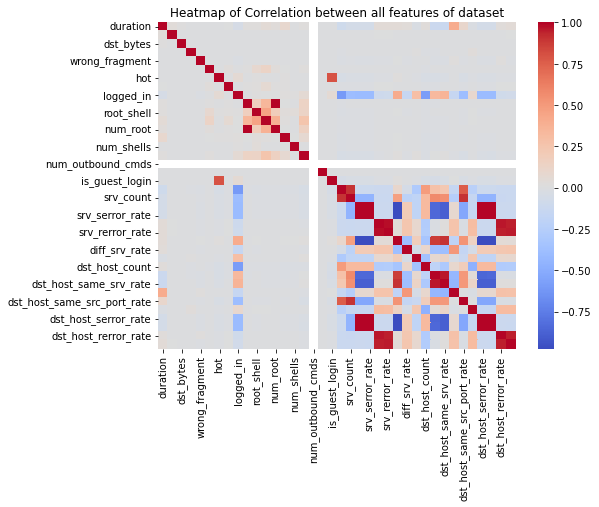

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(corrMatrix, cmap='coolwarm').set(title="Heatmap of Correlation between all features of dataset")

In [5]:
correlated_features = set()
for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i][j]) > 0.8 :
            column_name = corrMatrix.columns[i]
            correlated_features.add(column_name)
            
print("Here are the dependent features")
print(correlated_features)

Here are the dependent features
{'srv_serror_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'same_srv_rate', 'dst_host_srv_rerror_rate', 'srv_count', 'dst_host_serror_rate', 'srv_rerror_rate', 'num_root', 'is_guest_login', 'dst_host_srv_serror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_count'}


In [6]:
df.drop(correlated_features, inplace=True, axis=1)
print('Shape of the data -', df.shape,'\n--------------------------')
print('Features in the datas -', df.columns)

Shape of the data - (2718508, 29) 
--------------------------
Features in the datas - Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'count', 'serror_rate',
       'rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate',
       'intrusion_type'],
      dtype='object')


In [7]:
# Correlation Matrix following removal of dependent features from the dataset
corrMatrix = df.corr().round(3)
corrMatrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_outbound_cmds,is_host_login,count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
duration,1.000,0.041,0.020,-0.000,-0.002,0.004,0.003,0.007,-0.046,0.027,...,NaN,-0.000,-0.094,-0.061,0.047,0.042,-0.024,0.031,0.409,-0.017
src_bytes,0.041,1.000,0.000,-0.000,-0.000,-0.000,0.001,-0.000,-0.000,0.000,...,NaN,-0.000,-0.002,-0.001,0.007,0.000,-0.000,-0.002,0.001,-0.000
dst_bytes,0.020,0.000,1.000,-0.000,-0.000,0.000,0.000,0.001,0.002,0.001,...,NaN,0.000,-0.002,-0.002,0.005,-0.001,0.000,-0.001,0.003,0.000
land,-0.000,-0.000,-0.000,1.000,-0.000,-0.000,-0.000,-0.000,-0.002,-0.000,...,NaN,-0.000,-0.003,0.005,-0.000,0.000,0.013,-0.008,-0.001,0.033
wrong_fragment,-0.002,-0.000,-0.000,-0.000,1.000,-0.000,-0.001,-0.000,-0.012,-0.000,...,NaN,-0.000,-0.016,-0.011,-0.003,-0.005,-0.002,0.002,0.021,0.002
urgent,0.004,-0.000,0.000,-0.000,-0.000,1.000,0.004,0.031,0.002,0.018,...,NaN,-0.000,-0.002,-0.001,-0.000,-0.000,-0.000,-0.003,0.002,0.002
hot,0.003,0.001,0.000,-0.000,-0.001,0.004,1.000,0.004,0.060,0.003,...,NaN,0.001,-0.037,-0.024,-0.005,0.001,-0.005,-0.030,0.004,-0.006
num_failed_logins,0.007,-0.000,0.001,-0.000,-0.000,0.031,0.004,1.000,0.000,0.020,...,NaN,-0.000,-0.006,-0.004,0.012,-0.000,-0.002,-0.009,0.001,0.004
logged_in,-0.046,-0.000,0.002,-0.002,-0.012,0.002,0.060,0.000,1.000,0.005,...,NaN,0.001,-0.599,-0.401,-0.098,-0.143,0.297,-0.583,-0.145,0.096
num_compromised,0.027,0.000,0.001,-0.000,-0.000,0.018,0.003,0.020,0.005,1.000,...,NaN,0.001,-0.003,-0.001,-0.000,-0.001,-0.001,-0.004,0.002,0.003


[Text(0.5, 1.0, 'Heatmap of Correlation between features of dataset after removing correlated features')]

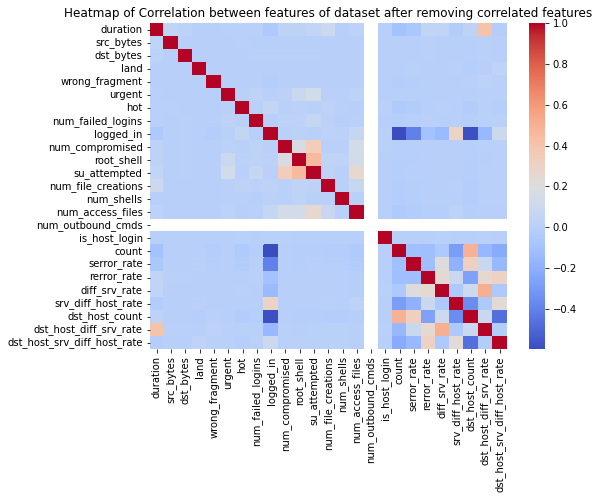

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(corrMatrix, cmap='coolwarm').set(title="Heatmap of Correlation between features of dataset after removing correlated features")

In [9]:
df['status'] = 'non-threat'
df['status'].loc[df.intrusion_type != 'normal.'] = 'threat'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
count                            int64
serror_rate                    float64
rerror_rate                    float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [11]:
df['land'] = df['land'].astype('object')
df['logged_in'] = df['logged_in'].astype('object')
df['is_host_login'] = df['is_host_login'].astype('object')

In [12]:
X = df.drop(['intrusion_type', 'status'], axis=1)
y = df['status']
X.shape

(2718508, 28)

In [13]:
X_transformed = pd.get_dummies(X, drop_first=True)
X_transformed.shape

(2718508, 106)

In [14]:
X_transformed_scaled = StandardScaler().fit_transform(X_transformed)

In [15]:
pca = PCA()

pca_data = pca.fit_transform(X_transformed_scaled)

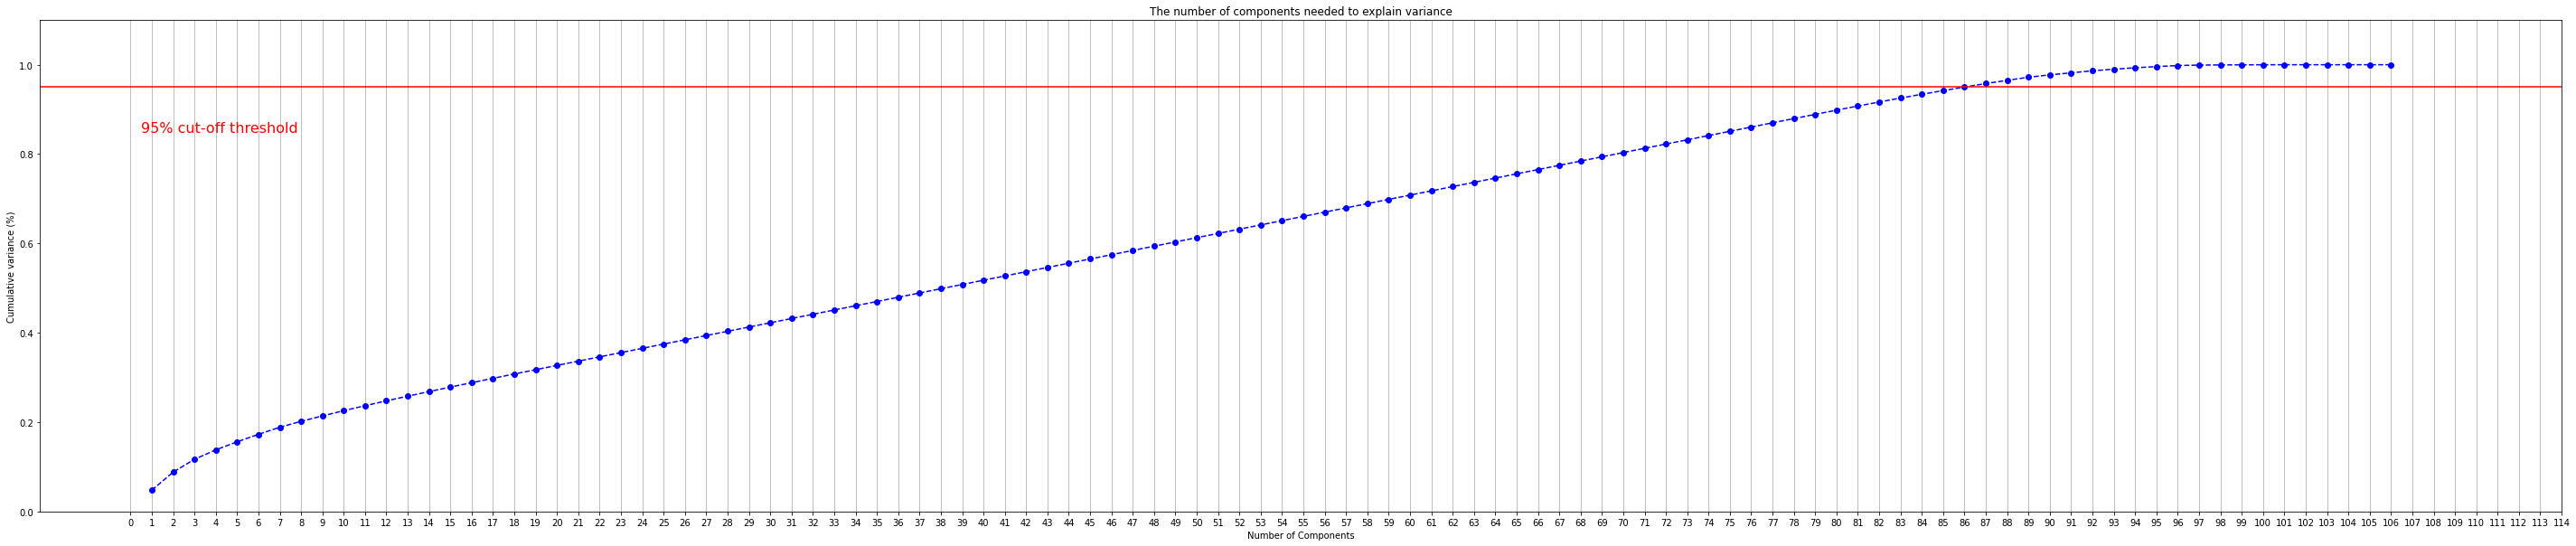

In [16]:
plt.rcParams["figure.figsize"] = (50, 10)

fig, ax = plt.subplots()
xi = np.arange(1, 107, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 115, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [17]:
y[y == 'threat'] = 1
y[y == 'non-threat'] = 0
y.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(2718508,)

In [18]:
y = y.astype('int')

In [ ]:
pca2 = PCA(n_components=86)

pca_data2 = pca2.fit_transform(X_transformed_scaled)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pca_data2, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

C:\Users\AnshulRanade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_preds = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
print('Accuracy Score for Logistic Regression ',accuracy_score(y_preds, y_test),'\n-----------------------------------------------')
print('F1 Score for Logistic Regression ',f1_score(y_preds, y_test))

0.9912217075499388

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_preds_dt = dt.predict(x_test)

In [ ]:
print('Accuracy Score for Decision Tree is',accuracy_score(y_preds_dt, y_test),'\n-----------------------------------------------')
print('F1 Score for Decision Tree is',f1_score(y_preds_dt, y_test))


0.9992814080354101